In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#Creating SQL connection

In [3]:
import django
from django.conf import settings

import os
import sqlite3

# Set the DJANGO_SETTINGS_MODULE environment variable
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'ils.settings')

# Initialize Django
django.setup()

db_path = os.path.join(settings.BASE_DIR, 'db.sqlite3')
conn = sqlite3.connect(db_path)

In [4]:
#User response table

In [5]:
# this cell

table_name = 'exam_userresponse'
query = f"SELECT * FROM {table_name}"
# df_userresponse = pd.read_sql_query(query, conn)
df_userresponse = pd.read_csv('smata.csv')
df_userresponse

,Unnamed: 0,id,time_spent,times_option_changed,is_correct,question_id,user_confidence
0,0,1,7000000,0,1,1,1
1,1,2,15000000,0,1,2,2
2,2,3,32000000,0,1,3,7
3,3,4,10000000,0,1,4,5
4,4,5,17000000,0,1,5,8
5,5,6,19000000,0,1,6,4
6,6,7,40000000,0,0,7,9
7,7,8,14000000,0,0,8,8
8,8,9,33000000,0,1,9,5
9,9,10,3000000,0,0,7,0


In [6]:
from math import floor

df_userresponse = df_userresponse.groupby('question_id').agg({
    'id':'last',
    'times_option_changed': 'sum',
    'is_correct': 'last',
    'time_spent': 'sum'
}).reset_index()

df_userresponse = df_userresponse[['id', 'times_option_changed', 'is_correct', 'question_id', 'time_spent']]

df_userresponse

,id,times_option_changed,is_correct,question_id,time_spent
0,14,0,1,1,11000000
1,15,0,1,2,24000000
2,16,0,1,3,37000000
3,17,0,1,4,22000000
4,18,0,1,5,36000000
5,19,0,1,6,26000000
6,20,0,0,7,59000000
7,21,0,0,8,20000000
8,22,0,1,9,42000000
9,23,0,1,10,12000000


In [7]:
#Questions table

In [8]:
# this cell

# table_name = 'exam_question'
table_name = 'quiz_question'
query = f"SELECT * FROM {table_name}"
df_question = pd.read_sql_query(query, conn)
df_question

,id,label,cognitive_ability,is_answered
0,1,What is the product of 12 and 9?,Level_1,0
1,2,"If y = 3, what is the value of 4y - 5?",Level_1,0
2,3,What is the perimeter of a square with a side ...,Level_1,0
3,4,"What is the next number in the series: 2, 5, 8...",Level_1,0
4,5,What is 20% of 150?,Level_1,0
5,6,Solve for x in the equation 3x - 7 = 11.,Level_2,0
6,7,"What is the next number in the sequence: 5, 10...",Level_2,0
7,8,"A box contains 4 red, 5 blue, and 6 green ball...",Level_2,0
8,9,What is the simple interest on $2000 at an ann...,Level_2,0
9,10,"If 'CAT' is coded as 'DBU', how is 'DOG' coded...",Level_2,0


In [9]:
question_cognitive_ability = dict(zip(df_question['id'], df_question['cognitive_ability']))
question_cognitive_ability

{1: 'Level_1',
 2: 'Level_1',
 3: 'Level_1',
 4: 'Level_1',
 5: 'Level_1',
 6: 'Level_2',
 7: 'Level_2',
 8: 'Level_2',
 9: 'Level_2',
 10: 'Level_2',
 11: 'Level_3',
 12: 'Level_3',
 13: 'Level_3',
 14: 'Level_3',
 15: 'Level_3'}

In [10]:
df_userresponse['cognitive_ability'] = df_userresponse['question_id'].map(question_cognitive_ability)
df_userresponse

,id,times_option_changed,is_correct,question_id,time_spent,cognitive_ability
0,14,0,1,1,11000000,Level_1
1,15,0,1,2,24000000,Level_1
2,16,0,1,3,37000000,Level_1
3,17,0,1,4,22000000,Level_1
4,18,0,1,5,36000000,Level_1
5,19,0,1,6,26000000,Level_2
6,20,0,0,7,59000000,Level_2
7,21,0,0,8,20000000,Level_2
8,22,0,1,9,42000000,Level_2
9,23,0,1,10,12000000,Level_2


In [11]:
df_userresponse['time_spent'] = df_userresponse['time_spent'].apply(lambda x: x / 1000000)

cognitive_ability_mapping = {'Level_1': 1, 'Level_2': 2, 'Level_3': 3}
df_userresponse['cognitive_ability'] = df_userresponse['cognitive_ability'].map(cognitive_ability_mapping)

df_userresponse

,id,times_option_changed,is_correct,question_id,time_spent,cognitive_ability
0,14,0,1,1,11.0,1
1,15,0,1,2,24.0,1
2,16,0,1,3,37.0,1
3,17,0,1,4,22.0,1
4,18,0,1,5,36.0,1
5,19,0,1,6,26.0,2
6,20,0,0,7,59.0,2
7,21,0,0,8,20.0,2
8,22,0,1,9,42.0,2
9,23,0,1,10,12.0,2


In [12]:
#Model

In [13]:
import joblib

model = joblib.load('confidence_predictor_model.pkl')
X = df_userresponse[['time_spent', 'times_option_changed', 'is_correct', 'cognitive_ability']]
predicted_confidence = model.predict(X)

df_userresponse['predicted_confidence'] = predicted_confidence
df_userresponse

,id,times_option_changed,is_correct,question_id,time_spent,cognitive_ability,predicted_confidence
0,14,0,1,1,11.0,1,3.98
1,15,0,1,2,24.0,1,3.02
2,16,0,1,3,37.0,1,6.05
3,17,0,1,4,22.0,1,3.42
4,18,0,1,5,36.0,1,6.46
5,19,0,1,6,26.0,2,3.63
6,20,0,0,7,59.0,2,4.99
7,21,0,0,8,20.0,2,5.86
8,22,0,1,9,42.0,2,3.68
9,23,0,1,10,12.0,2,4.34


In [14]:
taxonomy_level_mapping = {1:'Level_1', 2:'Level_2', 3:'Level_3'}
df_userresponse['cognitive_ability'] = df_userresponse['cognitive_ability'].map(taxonomy_level_mapping)

df_userresponse

,id,times_option_changed,is_correct,question_id,time_spent,cognitive_ability,predicted_confidence
0,14,0,1,1,11.0,Level_1,3.98
1,15,0,1,2,24.0,Level_1,3.02
2,16,0,1,3,37.0,Level_1,6.05
3,17,0,1,4,22.0,Level_1,3.42
4,18,0,1,5,36.0,Level_1,6.46
5,19,0,1,6,26.0,Level_2,3.63
6,20,0,0,7,59.0,Level_2,4.99
7,21,0,0,8,20.0,Level_2,5.86
8,22,0,1,9,42.0,Level_2,3.68
9,23,0,1,10,12.0,Level_2,4.34


In [15]:
#visualisations for report

In [16]:
average_time_spent = df_userresponse.groupby('cognitive_ability')['time_spent'].mean()

print(average_time_spent)

cognitive_ability
Level_1    26.0
Level_2    31.8
Level_3    17.0
Name: time_spent, dtype: float64


In [17]:
accuracy_ratios = df_userresponse.groupby('cognitive_ability')['is_correct'].mean().to_dict()

print(accuracy_ratios)

{'Level_1': 1.0, 'Level_2': 0.6, 'Level_3': 0.6}


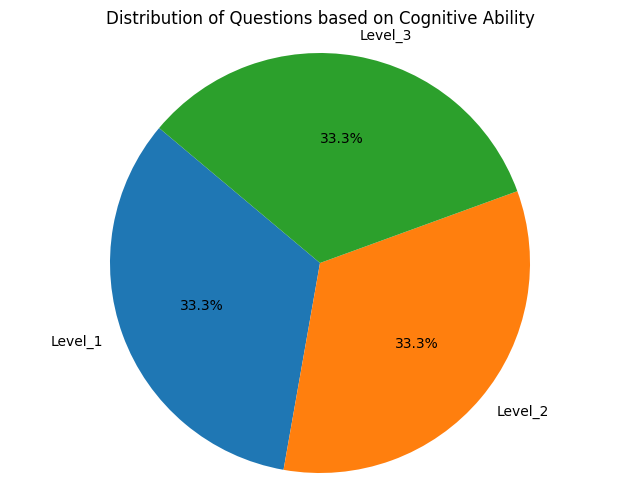

In [18]:
# Plotting
cognitive_ability_counts = df_userresponse['cognitive_ability'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cognitive_ability_counts, labels=cognitive_ability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Questions based on Cognitive Ability')
plt.axis('equal')

plt.show()

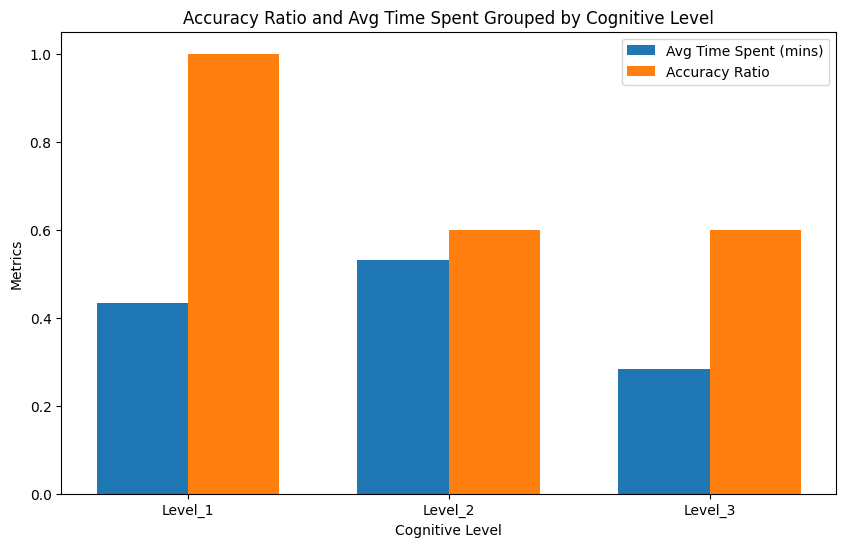

In [19]:
avg_time_spent_mins = {level: time_spent / 60 for level, time_spent in average_time_spent.items()}

levels = list(average_time_spent.keys())
accuracy_ratios_list = [accuracy_ratios[level] for level in levels]
avg_time_spent_mins_list = [avg_time_spent_mins[level] for level in levels]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(levels))

rects1 = ax.bar(index - bar_width / 2, avg_time_spent_mins_list, bar_width, label='Avg Time Spent (mins)')

rects2 = ax.bar(index + bar_width / 2, accuracy_ratios_list, bar_width, label='Accuracy Ratio')

ax.set_xlabel('Cognitive Level')
ax.set_ylabel('Metrics')
ax.set_title('Accuracy Ratio and Avg Time Spent Grouped by Cognitive Level')
ax.set_xticks(index)
ax.set_xticklabels(levels)
ax.legend()

plt.show()

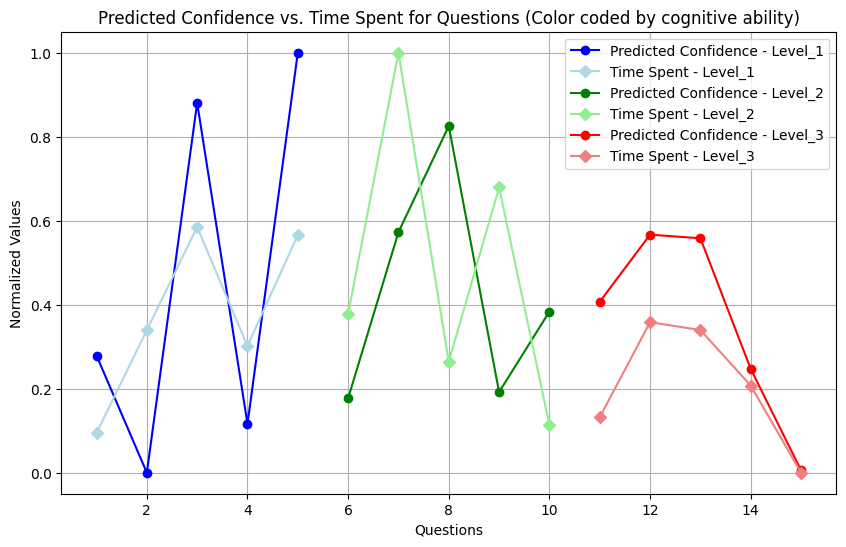

In [20]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
df_userresponse[['predicted_confidence', 'time_spent']] = scaler.fit_transform(df_userresponse[['predicted_confidence', 'time_spent']])

cognitive_ability_colors = {
    'Level_1': ('blue', 'lightblue'),
    'Level_2': ('green', 'lightgreen'),
    'Level_3': ('red', 'lightcoral')
}

# Plotting
plt.figure(figsize=(10, 6))

for  cognitive_ability, (confidence_color, time_color) in cognitive_ability_colors.items():
    subset_data = df_userresponse[df_userresponse['cognitive_ability'] == cognitive_ability] 
    plt.plot(subset_data['question_id'], subset_data['predicted_confidence'], marker='o', color=confidence_color, label=f'Predicted Confidence - {cognitive_ability}')
    plt.plot(subset_data['question_id'], subset_data['time_spent'], marker='D', color=time_color, label=f'Time Spent - {cognitive_ability}')

plt.xlabel('Questions')
plt.ylabel('Normalized Values')
plt.title('Predicted Confidence vs. Time Spent for Questions (Color coded by cognitive ability)')
plt.legend()
plt.grid(True)

plt.show()
